In [ ]:
from google.colab import files
files.upload()

Saving incidents_sample.csv to incidents_sample.csv
Saving emergencies_facilities.csv to emergencies_facilities.csv
Saving roads.csv to roads.csv
Saving locations.csv to locations.csv


{'incidents_sample.csv': b'incident_id,location_id,emergency_type,severity_level,description\nINC1,L1,Medical,High,Heart attack reported at Connaught Place\nINC2,L9,Medical,Medium,Injury reported at Sarojini Nagar Market\nINC3,L15,Medical,Low,Dehydration case at Lodhi Garden\nINC4,L11,Medical,Medium,Road accident injuries at Rajouri Garden\nINC5,L4,Fire,High,Fire near India Gate circle\nINC6,L10,Fire,Medium,Shop fire reported in Lajpat Nagar Market\nINC7,L20,Fire,High,Residential building fire in Mayur Vihar\nINC8,L12,Fire,Low,Electrical fire near Akshardham\nINC9,L7,Medical,Medium,Fall injury at Qutub Minar\nINC10,L8,Medical,Low,Minor injury at Lotus Temple\nINC11,L5,Fire,Medium,Small fire on railway platform\nINC12,L6,Medical,Medium,Passenger emergency at Nizamuddin Station\nINC13,L13,Medical,High,Medical emergency at Dwarka Sector 21 Metro\nINC14,L14,Fire,Low,Vehicle fire near Dhaula Kuan\nINC15,L3,Medical,High,Critical emergency at Safdarjung Hospital entry\n',
 'emergencies_facili

# Emergency Response Dispatch System – Part 1
## Emergency Network Modelling & Core DSA Algorithms

### Objective
To model New Delhi as a weighted graph and apply core Data Structures
and Algorithms (DSA) such as Graphs, BFS, DFS, Hashing, and Dijkstra’s
Algorithm to analyze connectivity and compute shortest emergency routes.

In [ ]:
import pandas as pd

locations = pd.read_csv("locations.csv")
roads = pd.read_csv("roads.csv")
facilities = pd.read_csv("emergencies_facilities.csv")
incidents = pd.read_csv("incidents_sample.csv")

In [ ]:
display(locations.head())
display(roads.head())
display(facilities.head())
display(incidents.head())

,id,name,latitude,longitude,category
0,L1,Connaught Place,28.6315,77.2167,Market
1,L2,AIIMS Delhi,28.5662,77.2100,Hospital
2,L3,Safdarjung Hospital,28.5677,77.2109,Hospital
3,L4,India Gate,28.6129,77.2295,Tourist
4,L5,New Delhi Railway Station,28.6430,77.2194,Transport


,source_id,target_id,distance_km,avg_traffic_delay_min
0,L1,L2,7,10
1,L1,L4,3,6
2,L2,L3,1,5
3,L2,L9,4,7
4,L3,L14,5,8


,location_id,facility_type,name,capacity_level
0,L2,Hospital,AIIMS Emergency,High
1,L3,Hospital,Safdarjung Trauma Centre,High
2,L5,Hospital,Railway Station Medical Unit,Low
3,L17,Hospital,IGI Airport Medical Unit,Low
4,L9,FireStation,Sarojini Nagar Fire Station,Medium


,incident_id,location_id,emergency_type,severity_level,description
0,INC1,L1,Medical,High,Heart attack reported at Connaught Place
1,INC2,L9,Medical,Medium,Injury reported at Sarojini Nagar Market
2,INC3,L15,Medical,Low,Dehydration case at Lodhi Garden
3,INC4,L11,Medical,Medium,Road accident injuries at Rajouri Garden
4,INC5,L4,Fire,High,Fire near India Gate circle


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq

**Building the City Graph**

2️⃣ Graph Construction (Weighted Undirected Graph)

Weight Formula (as required)
Weight = distance_km + avg_traffic_delay_min/3

In [ ]:
G = nx.Graph()

for _, row in locations.iterrows():
    G.add_node(row["id"], name=row["name"], category=row["category"])

for _, row in roads.iterrows():
    weight = row["distance_km"] + row["avg_traffic_delay_min"]/3
    G.add_edge(row["source_id"], row["target_id"], weight=weight)

In [ ]:
print("Total Nodes (Locations):", G.number_of_nodes())
print("Total Edges (Roads):", G.number_of_edges())

Total Nodes (Locations): 20
Total Edges (Roads): 20


**Hashing & Searching (O(1) Lookups)**

In [ ]:

location_lookup = {
    row["name"]: row["id"]
    for _, row in locations.iterrows()
}

facility_map = {
    "Medical": facilities[facilities["facility_type"] == "Hospital"]["location_id"].tolist(),
    "Fire": facilities[facilities["facility_type"] == "FireStation"]["location_id"].tolist()
}

### Hashing for Fast Lookup
A hash map is used to map location names to location IDs.
This enables O(1) average-time lookup when users input location names.

**DSA Algorithms**

**Breadth-First Search (BFS)**

In [ ]:
def bfs(start_node):
    visited = set()
    queue = deque([start_node])

    while queue:
        node = queue.popleft()
        if node not in visited:
            visited.add(node)
            queue.extend(set(G.neighbors(node)) - visited)

    return visited

In [ ]:
reachable_nodes = bfs("L1")
print("Total reachable locations:", len(reachable_nodes))

Total reachable locations: 17


**DFS – Connectivity Depth**

In [27]:
def dfs(node, visited=None):
    if visited is None:
        visited = set()

    visited.add(node)
    for neighbor in G.neighbors(node):
        if neighbor not in visited:
            dfs(neighbor, visited)

    return visited

In [28]:
dfs_result = dfs("L1")
print("DFS Reachable Locations:", dfs_result)
print("Total Reachable Nodes:", len(dfs_result))

DFS Reachable Locations: {'L14', 'L9', 'L8', 'L10', 'L3', 'L7', 'L19', 'L4', 'L12', 'L6', 'L16', 'L2', 'L20', 'L11', 'L15', 'L5', 'L1'}
Total Reachable Nodes: 17


### BFS & DFS Analysis
BFS explores the graph level by level and is useful for reachability analysis.
DFS explores deeper paths and helps detect connectivity and isolated regions.

**Shortest Path – Dijkstra’s Algorithm**
Dijkstra’s algorithm uses a priority queue (min-heap) to always expand the node with the minimum cumulative cost, ensuring optimal shortest paths in graphs with non-negative weights.


In [29]:
def shortest_path(source, destination):
    try:
        path = nx.dijkstra_path(G, source, destination, weight="weight")
        cost = nx.dijkstra_path_length(G, source, destination, weight="weight")
        return path, cost
    except nx.NetworkXNoPath:
        return None, float("inf")

In [30]:
path, cost = shortest_path("L1", "L2")

if path is None:
    print("No path exists between selected locations.")
else:
    print("Shortest Path:", path)
    print("Total Cost:", cost)

Shortest Path: ['L1', 'L2']
Total Cost: 10.333333333333334


**User Interaction**

In [32]:
print("Available Locations:")
for name in location_lookup:
    print("-", name)

start_name = input("\nEnter START location name: ")
end_name = input("Enter DESTINATION location name: ")

start_id = location_lookup[start_name]
end_id = location_lookup[end_name]

path, cost = shortest_path(start_id, end_id)

if path is None:
    print("No route exists between selected locations.")
else:
    print("Shortest Route:", path)
    print("Estimated Cost:", cost)

Available Locations:
- Connaught Place
- AIIMS Delhi
- Safdarjung Hospital
- India Gate
- New Delhi Railway Station
- Hazrat Nizamuddin Station
- Qutub Minar
- Lotus Temple
- Sarojini Nagar Market
- Lajpat Nagar Market
- Rajouri Garden Market
- Akshardham Temple
- Dwarka Sector 21 Metro
- Dhaula Kuan
- Lodhi Garden
- Deer Park
- IGI Airport T3
- Parliament House
- Select Citywalk Mall
- Mayur Vihar Phase 1

Enter START location name: AIIMS Delhi
Enter DESTINATION location name: Parliament House
No route exists between selected locations.


**Graph Visualization**

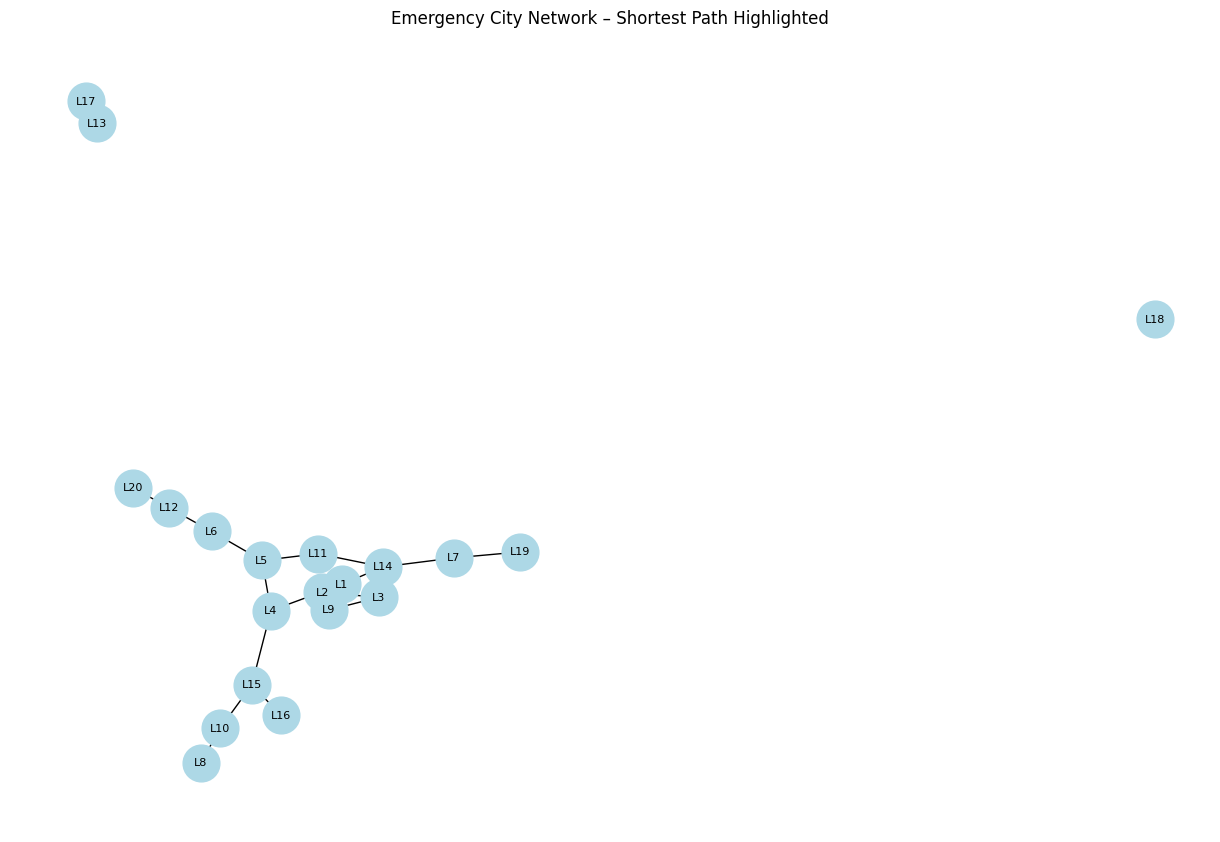

In [33]:
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G, seed=42)

nx.draw(
    G, pos,
    with_labels=True,
    node_color="lightblue",
    node_size=700,
    font_size=8
)

if path:
    edges = list(zip(path, path[1:]))
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color="red", width=3)

plt.title("Emergency City Network – Shortest Path Highlighted")
plt.show()

### Part-1 Summary
- The city was modeled as a weighted undirected graph.
- BFS and DFS were used to analyze connectivity.
- Dijkstra’s algorithm computed the shortest emergency routes.
- Hashing enabled fast location lookup.
- Visualization helped understand the emergency network structure.